In [3]:
######## Prob 3 N 100 #############
import numpy as np
import matplotlib.pyplot as plt
def omp3(A, y, s):
    """
    Implementation of OMP algorithm.
    """
    residual = y
    support = []
    for i in range(s):
        scores = np.abs(A.T @ residual)
        index = np.argmax(scores)
        support.append(index)
        x = np.zeros(A.shape[1])
        x[support] = np.linalg.pinv(A[:, support]) @ y
        residual = y - A @ x
        if np.linalg.norm(residual) < 1e-6:
            break
    x_omp = np.zeros(A.shape[1])
    for sp in support:
      x_omp[support]=x[support]
    return x_omp, support

def noiseless_phase_transition_omp3(N, M_values, s):
    """
    Generate noiseless phase transition plot for OMP algorithm.
    """
    prob_recovery = np.zeros((1, len(M_values), s))
    # for n in range(len(N_values)):
    #     N = N_values[n]
    for m in range(len(M_values)):
        M = M_values[m]
        ##### Generating A #########
        A = np.random.normal(size=(M, N))
        A /= np.linalg.norm(A, axis=0)
        ############################
        for s in range(1, s+1):
            num_success = 0
            for i in range(2000):
                #x = generate_sparse_vector(N, s)
                ########### Generating x  ###############
                index=0
                support=np.zeros(s,dtype=int)
                while(index!=s):
                    gen=np.random.uniform(1,N)
                    if(int(gen) not in support):
                      support[index]=int(gen)
                      index+=1
                x=np.zeros(N)
                for j in support:
                  k=np.random.uniform(-10,11)
                  while(int(k)==0):
                    k=np.random.uniform(-10,11)
                  x[j]=k
                ####################################
                y = A @ x
                x_omp, support = omp3(A, y, s)
                if set(support) == set(np.nonzero(x)[0]):
                    num_success += 1
            prob_recovery[0, m, s-1] = num_success / 2000
    return prob_recovery

# Define parameters
def solve_problem3(n):
  N_values = n
  M_values = np.arange(1, n)
  s_max = int(n*7/20)

  # Generate noiseless phase transition plot for exact support recovery probability
  prob_recovery = noiseless_phase_transition_omp3(N_values, M_values, s_max)

  # Plot the results as a 2D image
  # for n in range(len(N_values)):
      #N = N_values[n]
  N = N_values
  plt.imshow(prob_recovery[0], origin='lower', aspect='auto', cmap='gray_r', extent=[1, M_values[-1], 1, s_max])
  plt.colorbar()
  plt.title(f"Noiseless phase transition plot for N = {N}")
  plt.xlabel("Number of measurements (M)")
  plt.ylabel("Sparsity level (s)")
  plt.show()

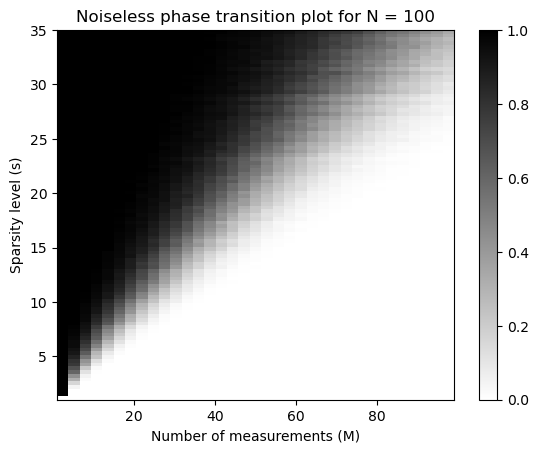

In [4]:
solve_problem3(100)